In [100]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import glob
from scipy import misc
import tensorflow as tf
import numpy as np
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam 

#Get back the convolutional part of a VGG network trained on ImageNet

In [130]:

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [102]:
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [103]:
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


In [104]:
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


In [105]:
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [106]:
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


In [107]:
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


In [108]:
# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


In [109]:
# Output Layer
model.add(Dense(units=4))
model.add(Activation('softmax'))

batch_size = 4

# this is the augmentation configuration we will use for training
train_datagen = image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = image.ImageDataGenerator()


In [122]:

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
class_names = ['0','1','2','3']
train_generator = train_datagen.flow_from_directory(
        "./Images/Percentages_Set/Training",  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
          class_mode='categorical',
       )  # since we use binary_crossentropy loss, we need binary labels

# # this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
          "./Images/Percentages_Set/Validation",
          target_size=(224, 224),
          class_mode='categorical',
          batch_size=batch_size,
         )

test_generator = test_datagen.flow_from_directory(
          "./Images/Percentages_Set/Test",
          target_size=(224, 224),
          batch_size=1,
          class_mode=None,
          shuffle='False'
            )



Found 139 images belonging to 4 classes.
Found 52 images belonging to 4 classes.
Found 12 images belonging to 1 classes.


In [123]:
print(validation_generator.class_indices)

{'Crack0': 0, 'Crack1': 1, 'Crack2': 2, 'Non Crack': 3}


Epoch 1/50
15/15 [==============================] - 30s 2s/step - loss: 1.8640 - acc: 0.2667 - val_loss: 9.2758 - val_acc: 0.3000
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 1.8262 - acc: 0.2333 - val_loss: 7.3788 - val_acc: 0.4500
Epoch 3/50
15/15 [==============================] - 19s 1s/step - loss: 1.7785 - acc: 0.2774 - val_loss: 6.4749 - val_acc: 0.5500
Epoch 4/50
15/15 [==============================] - 17s 1s/step - loss: 1.8733 - acc: 0.2167 - val_loss: 7.1122 - val_acc: 0.4750
Epoch 5/50
15/15 [==============================] - 17s 1s/step - loss: 1.8681 - acc: 0.2669 - val_loss: 5.4545 - val_acc: 0.5375
Epoch 6/50
15/15 [==============================] - 18s 1s/step - loss: 1.6819 - acc: 0.3000 - val_loss: 6.5448 - val_acc: 0.4500
Epoch 7/50
15/15 [==============================] - 18s 1s/step - loss: 1.7384 - acc: 0.2669 - val_loss: 1.7558 - val_acc: 0.5375
Epoch 8/50
15/15 [==============================] - 21s 1s/step - loss: 1.7184 - acc: 0.31

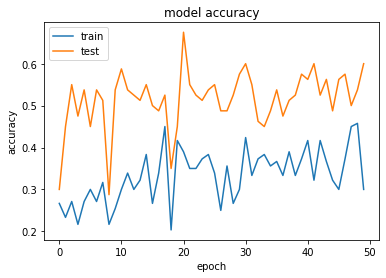

In [124]:


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
filepath="weights.best.hdf5_2"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
#history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=5, verbose=1,callbacks=callbacks_list, validation_data=validation_generator, validation_steps=5) #epochs=50, steps=2000
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
history =model.fit_generator(generator=train_generator,
                    steps_per_epoch=15,
                    validation_data=validation_generator,
                    validation_steps=20,
                    epochs=50,verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#not necessary

model.load_weights("weights.best.hdf5_2")
prediction = model.predict_generator(test_generator, steps=100, max_queue_size=1, workers=1, use_multiprocessing=False, verbose=1)
prediction_net=[]



In [125]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


12/12 [==============================] - 2s 133ms/step


In [126]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


In [128]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=True)

In [129]:
#Adding regression layer
print(pred)


[[2.98504591e-01 1.00333899e-01 1.09887458e-01 4.91274029e-01]
 [1.11501571e-03 1.19332995e-04 1.17677460e-04 9.98648107e-01]
 [2.11130064e-02 2.07154662e-03 1.85595045e-03 9.74959493e-01]
 [6.92605216e-04 1.38489082e-02 2.66069751e-02 9.58851457e-01]
 [2.68444061e-01 2.93425657e-02 2.80127879e-02 6.74200535e-01]
 [4.41409737e-01 5.45061417e-02 4.81535383e-02 4.55930620e-01]
 [4.97603327e-01 6.26912192e-02 5.23695201e-02 3.87335926e-01]
 [1.33477501e-04 6.92446437e-03 1.28327580e-02 9.80109215e-01]
 [3.76515347e-03 4.63654957e-04 4.53515182e-04 9.95317698e-01]
 [2.14451686e-01 1.62827745e-01 5.31417370e-01 9.13032144e-02]
 [7.15986669e-01 1.03107803e-01 1.08984791e-01 7.19206855e-02]
 [2.97436774e-01 1.60631239e-01 4.89172727e-01 5.27591705e-02]]
